In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.signal
from mpl_toolkits import mplot3d


ts = np.loadtxt("elNino.txt", usecols=range(1,13), dtype='float')
print(tempdiff := np.ndarray.flatten(ts))

[-1.   -1.2  -0.83 ... -0.99 -0.76 -0.86]


Plot the time series:

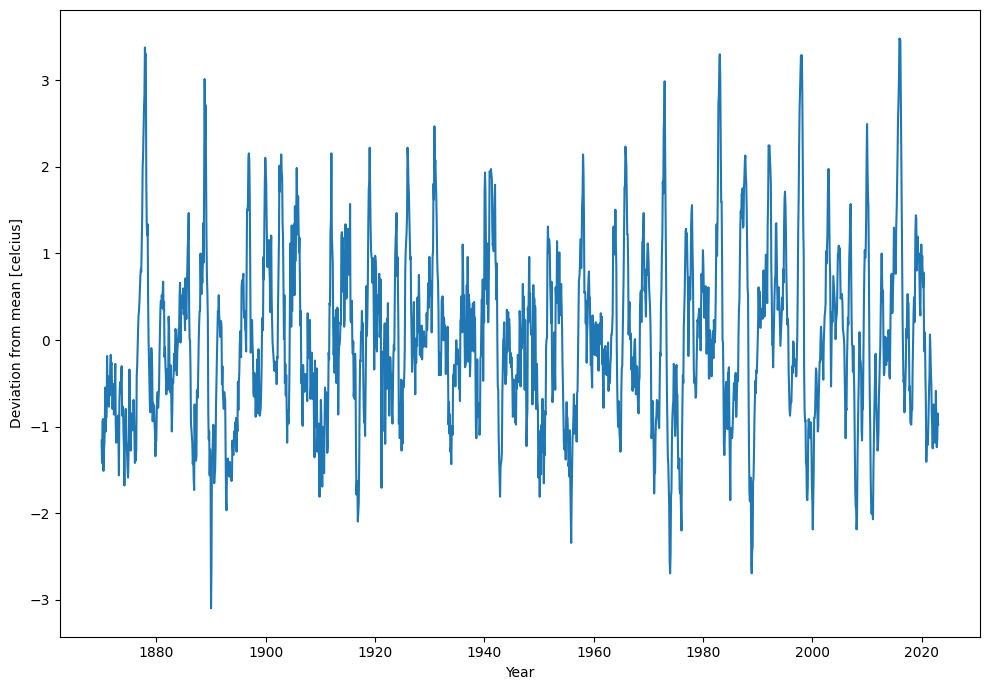

1836


In [50]:
flat_data = tempdiff - np.mean(tempdiff)
flat_data = flat_data / np.std(flat_data)
t = pd.date_range(start='1870-01-01',
                  end='2022-12-31',
                  periods=len(flat_data))
plt.plot(t, flat_data)
plt.xlabel("Year")
plt.ylabel("Deviation from mean [celcius]")
plt.show()
print(len(flat_data))

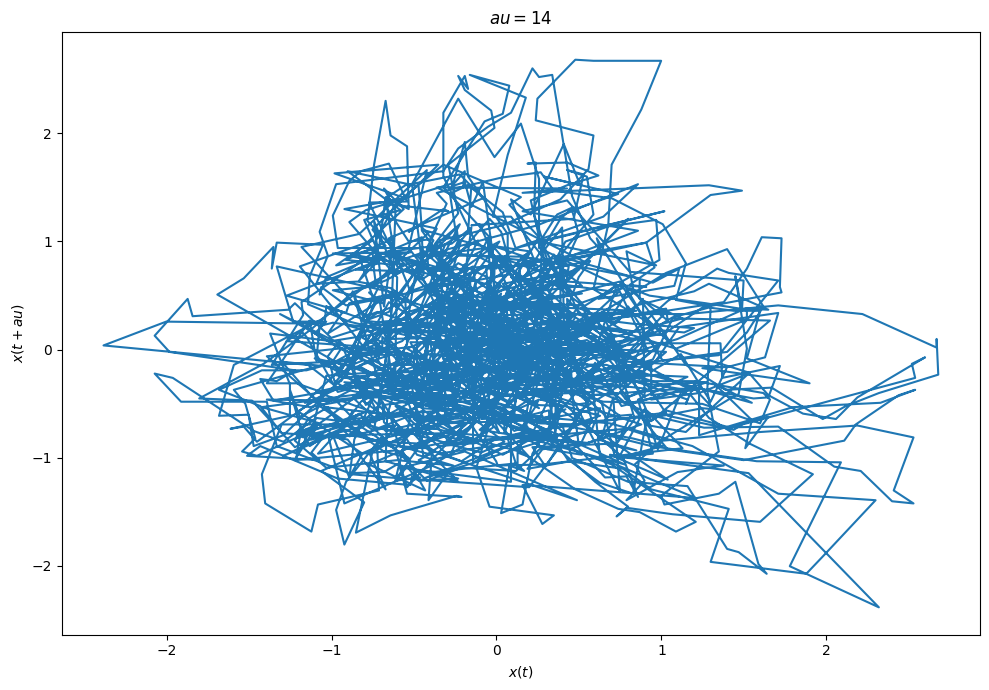

In [48]:
def return_map(ts, tau):
    plt.rcParams["figure.figsize"] = [10.00, 7]
    plt.rcParams["figure.autolayout"] = True
    plt.plot(ts[:-(tau)], ts[tau:])
    plt.xlabel("$x(t)$")
    plt.ylabel("$x(t+\tau)$")
    plt.title(f"$\tau = {tau}$")
    plt.show()
return_map(flat_data, 14)

Plot the return map using different lags:

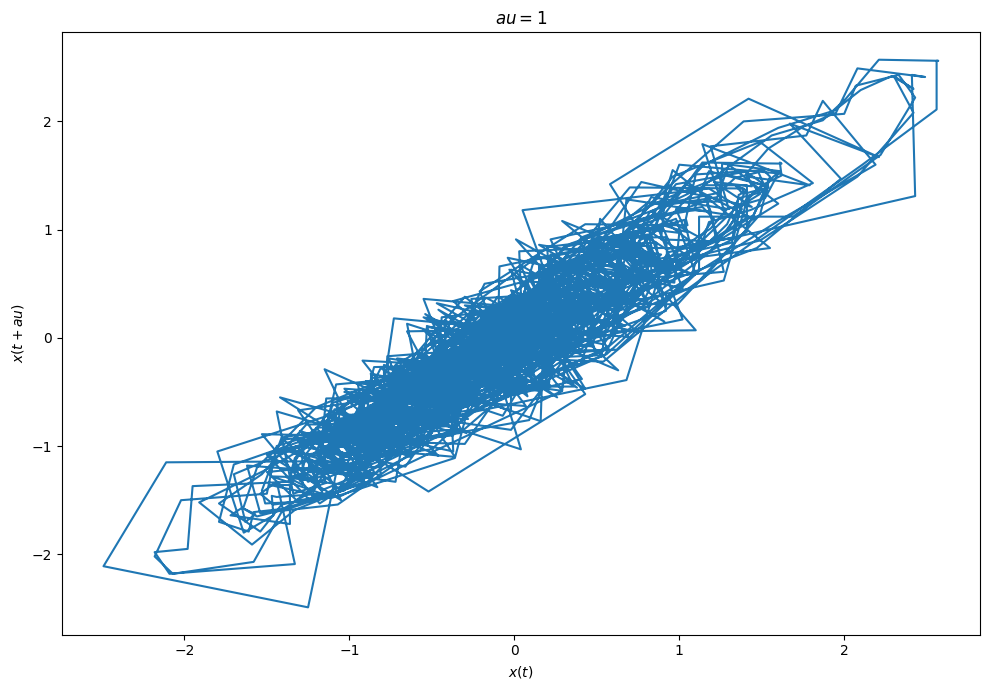

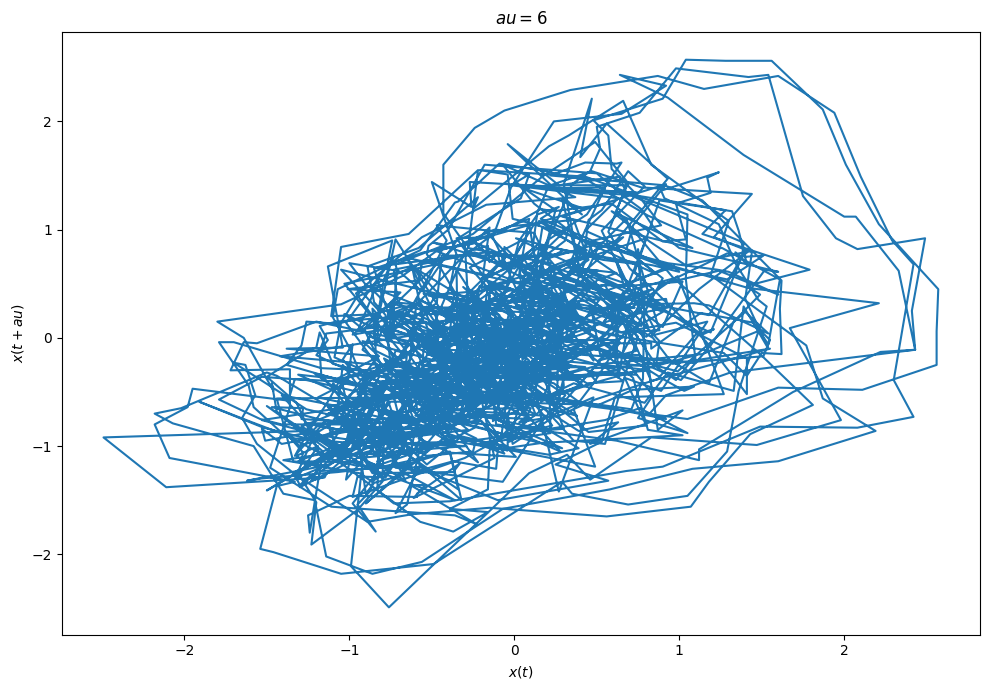

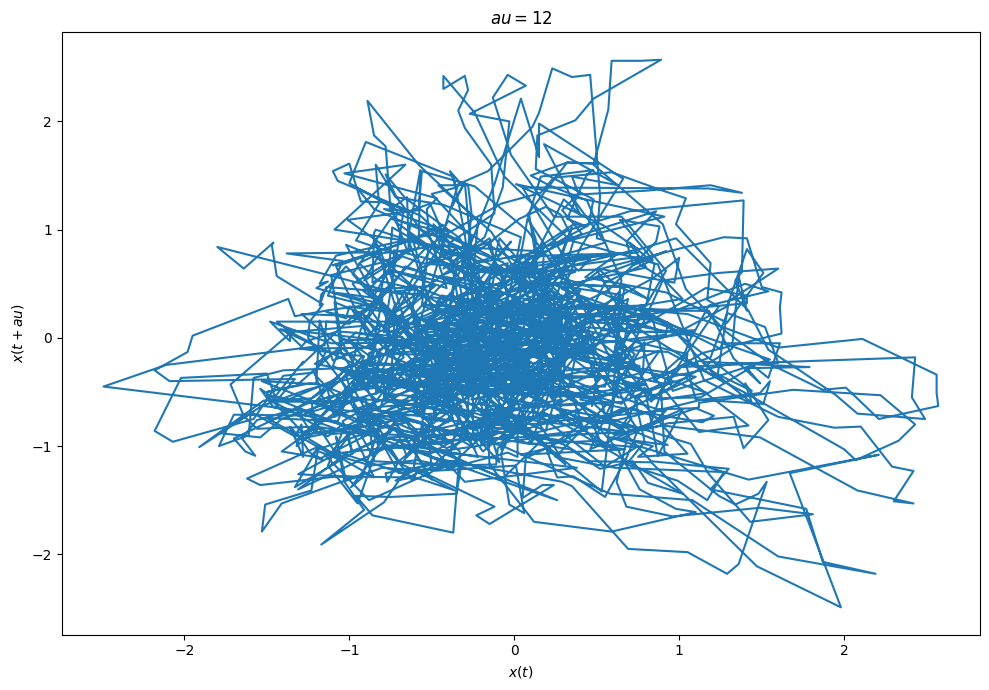

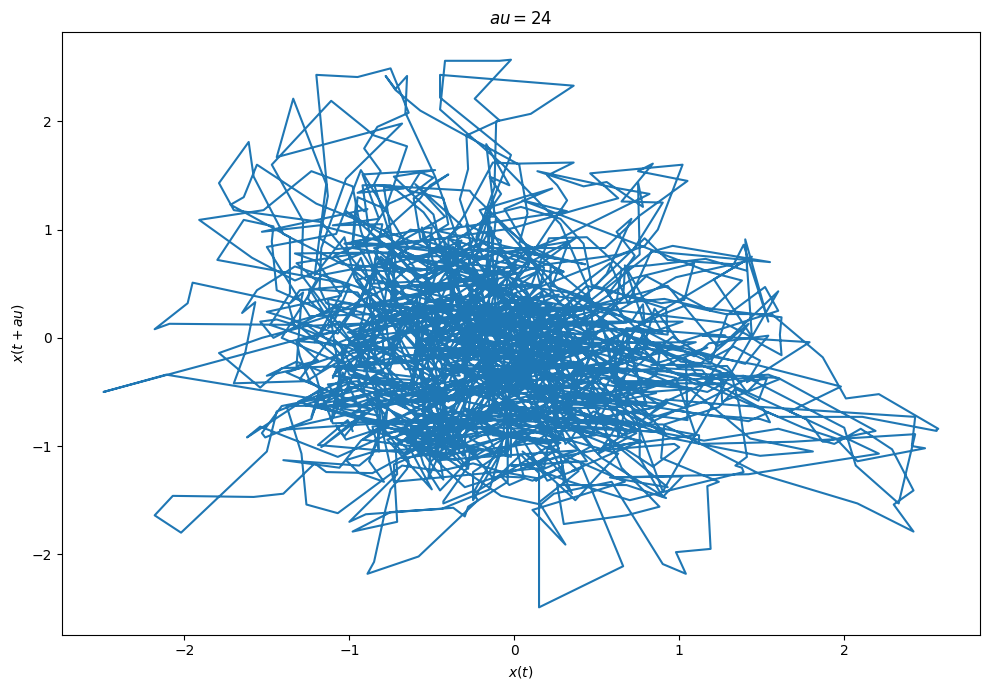

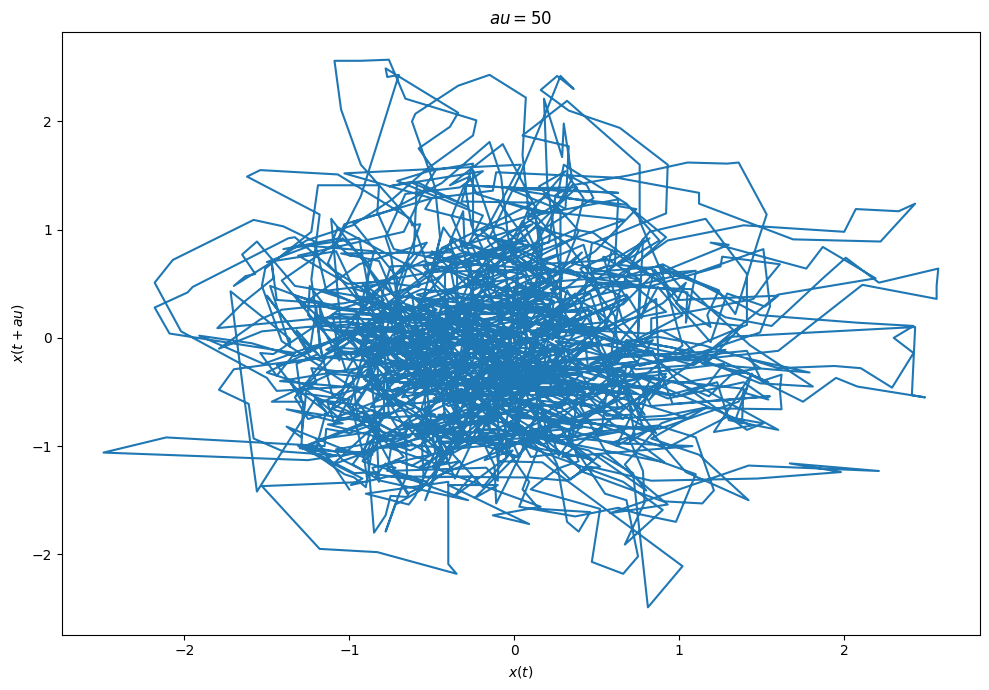

In [8]:
taus = [1, 6, 12, 24, 50]

for tau in taus:
    return_map(flat_data, tau)



Plot the distribution of data values, calculate my, sigma, S, and K:

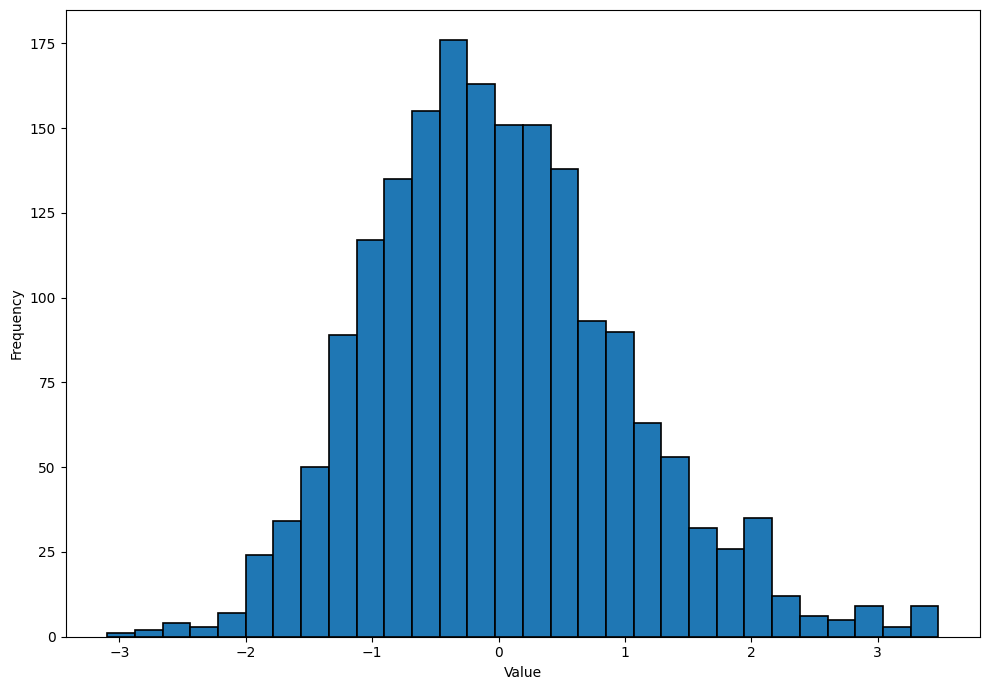

-0.080792942912891
0.0
0.9999999999999999
0.4713713415690936
0.4180523627779258


/var/folders/h8/b971bz894tn3xsv5xd65dq2c0000gn/T/ipykernel_48553/2137248398.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  CoV = S/abs(mean)


In [52]:


plt.hist(flat_data, 30, edgecolor='black', linewidth=1.2)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

S = np.std(flat_data)
median = np.median(flat_data)
mean = np.mean(flat_data)
std = np.std(flat_data)
skewness = scipy.stats.skew(flat_data)
kurtosis = scipy.stats.kurtosis(flat_data)
CoV = S/abs(mean)
print(median)
print(mean)
print(std)
print(skewness)
print(kurtosis)

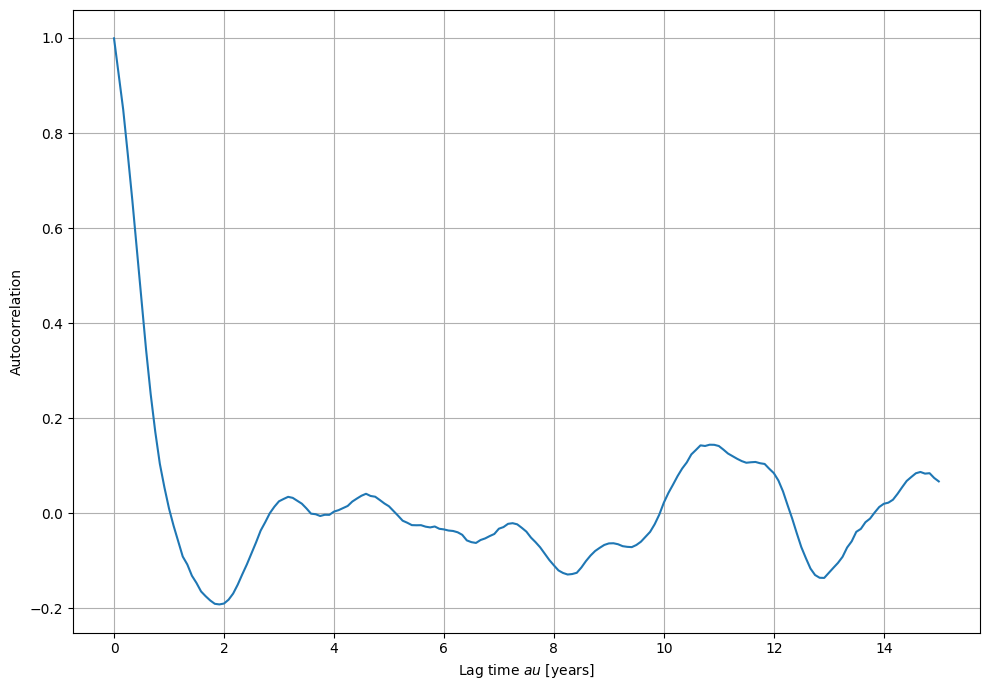

In [76]:
def ACF(ts, tau: int) -> float:

    N = len(ts)
    mean = np.mean(ts)
    std = np.std(ts)
    acf = 1 / ((std**2) *(N-tau)) * sum([(ts[t] - mean) * (ts[t+tau]) for t in range(1, N-tau)])
    return acf

max_lag = 180
lags = np.arange(max_lag+1)
acf = np.zeros_like(lags, dtype=float)
for tau in lags:
    acf[tau] = np.mean(ACF(flat_data, tau))

# Plot autocorrelation vs. lag time
plt.plot(lags/12, acf)
plt.xlabel('Lag time $\tau$ [years]')
plt.ylabel('Autocorrelation')
plt.grid()
plt.show()

Calculate the PSD:

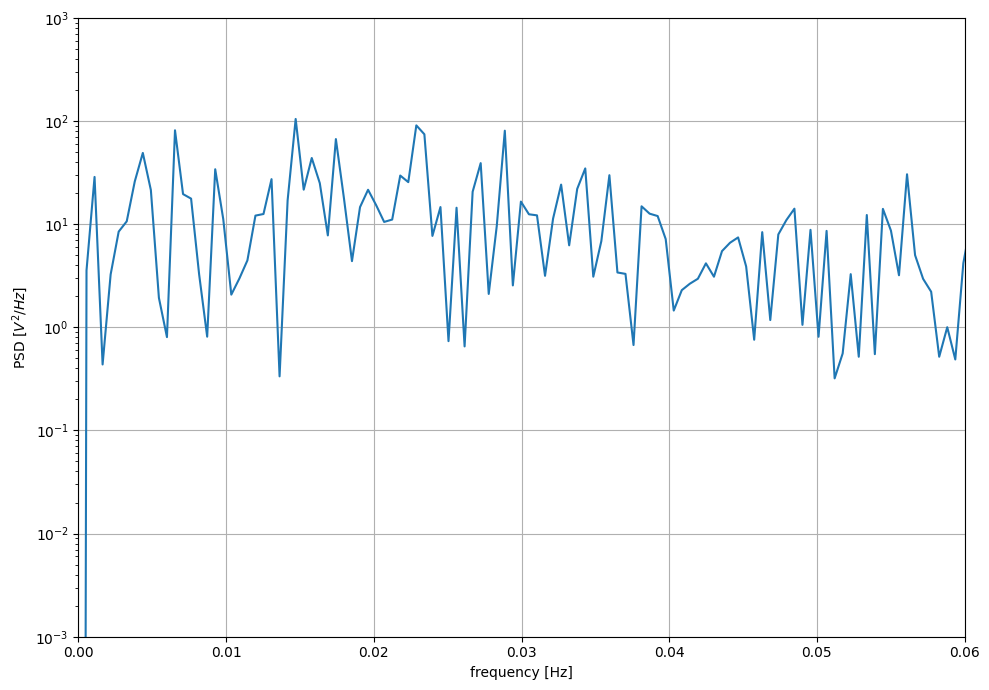

[68.         43.71428571]


In [65]:
(f, S) = scipy.signal.periodogram(flat_data, 1, scaling='density')
plt.semilogy(f, S)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [$V^2/Hz$]')
plt.xlim(0,0.06)
plt.ylim(10e-4, 10e2)
plt.grid()
plt.show()

# Find the indices of the two highest peaks in the power spectral density
indices = np.argsort(S)[::-1][:2]

# Get the corresponding frequencies
f_peaks = f[indices]

print(1/f_peaks)

Reconstruct the attractor by using peaks from the PSD:

1725
1725
1725


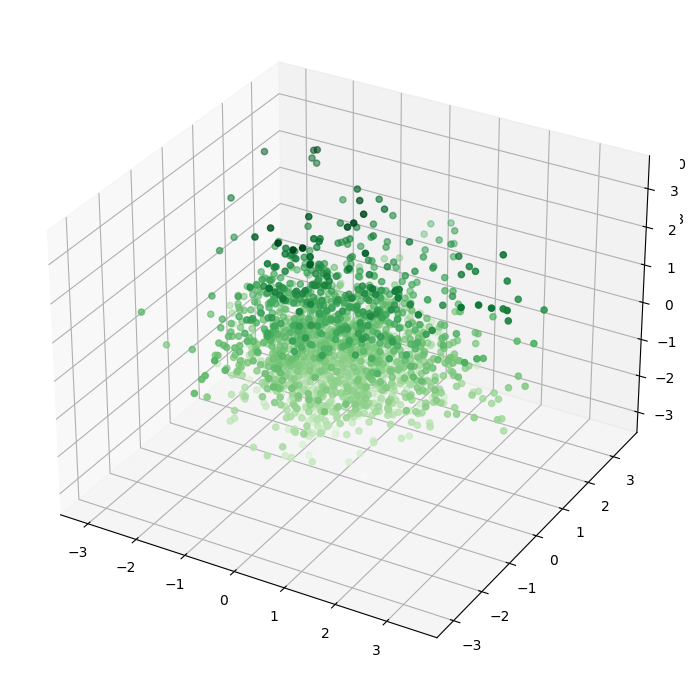

In [66]:
peak_1, peak_2 = [int(1/peak) for peak in f_peaks]

ax = plt.axes(projection='3d')

zline = flat_data[:-(peak_1 + peak_2)]
xline = flat_data[peak_1:-(peak_2)]
yline = flat_data[peak_1+peak_2:]

print(len(xline))
print(len(yline))
print(len(zline))

ax = plt.axes(projection='3d')
ax.scatter3D(xline, yline, zline, c=zline, cmap='Greens')

Comparison with gaussian noise:

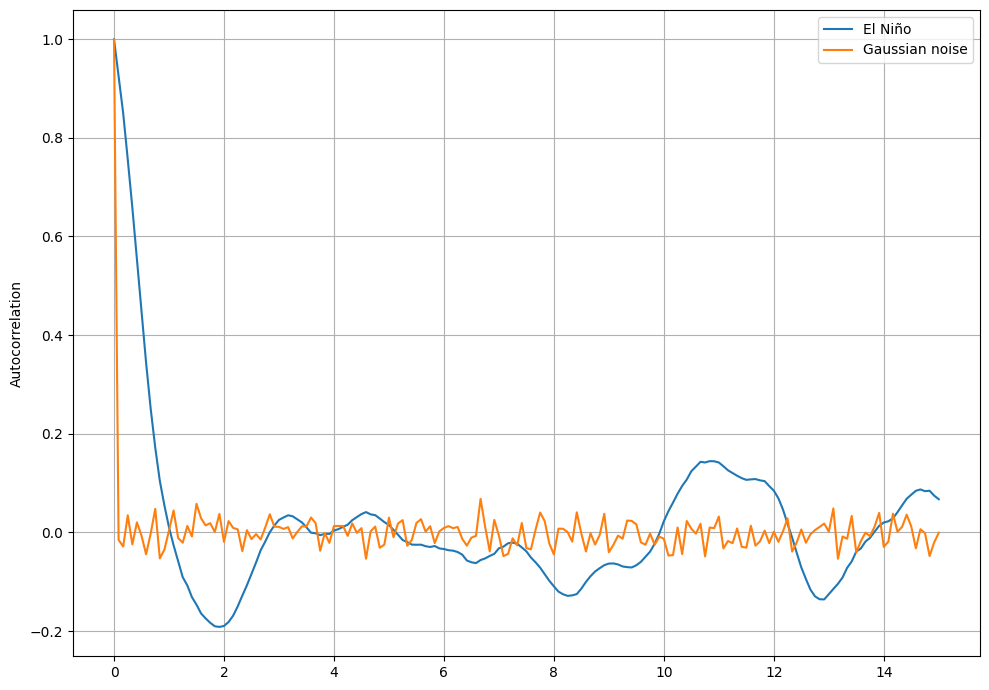

In [78]:
gaussian_noise = np.random.normal(loc=0, scale=1, size=len(flat_data))

max_lag = 180
lags = np.arange(max_lag+1)
acf_g = np.zeros_like(lags, dtype=float)
for tau in lags:
    acf_g[tau] = np.mean(ACF(gaussian_noise, tau))

# Plot autocorrelation vs. lag time
plt.plot(lags/12, acf, label="El Niño")
plt.plot(lags/12, acf_g, label="Gaussian noise")
plt.ylabel('Autocorrelation')
plt.legend()
plt.grid()
plt.show()



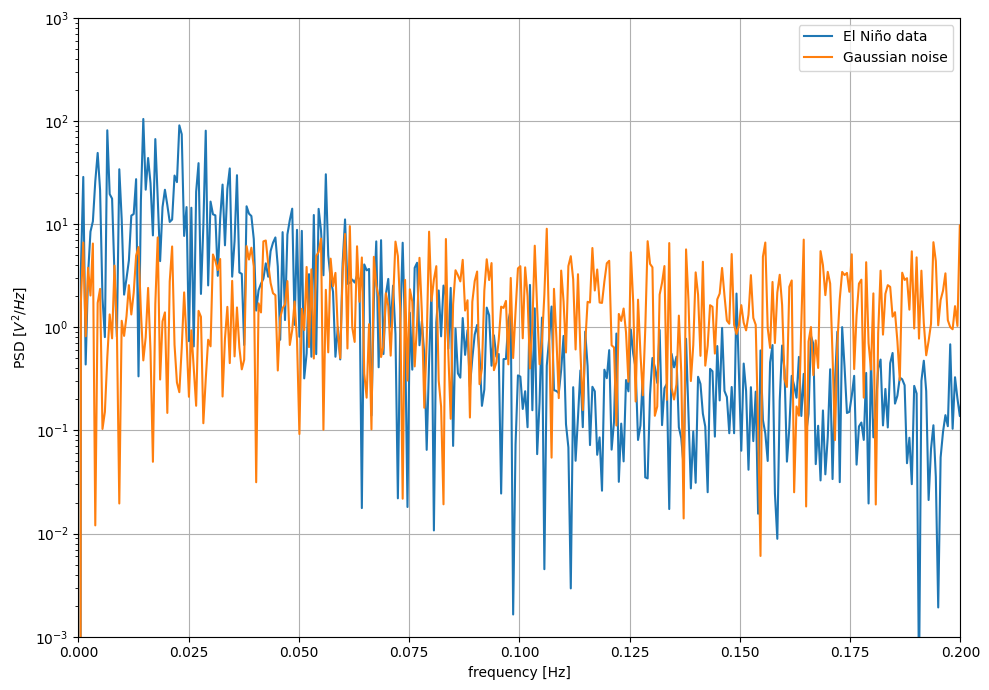

In [74]:
(fg, Sg) = scipy.signal.periodogram(flat_data, 1, scaling='density')
plt.semilogy(fg, Sg, label="El Niño data")

(f, S) = scipy.signal.periodogram(gaussian_noise, 1, scaling='density')
plt.semilogy(f, S, label="Gaussian noise")

plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [$V^2/Hz$]')
plt.xlim(0,0.2)
plt.ylim(10e-4, 10e2)
plt.legend()
plt.grid()